# K-Means Algorithm

In [1]:
# Essentials:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# t-SNE visualization
from sklearn.manifold import TSNE

# imputation
from sklearn.impute import KNNImputer

# Scaling
from sklearn.preprocessing import StandardScaler

# PCA
from sklearn.decomposition import PCA

# K-means for Clustering
from sklearn.cluster import KMeans

# elbow method
from yellowbrick.cluster import KElbowVisualizer

# cluster metrics
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

# Silhouette Visualizer
from yellowbrick.cluster import SilhouetteVisualizer

## Load the dataset:

In [2]:
url = 'D:\Sem 6\EDA\Project\data\Bank-Customer-Profiling-and-Segmentation-main\Bank-Customer-Profiling-and-Segmentation-main\data\marketing_data.csv'
cc_general = pd.read_csv(url)
cc_general.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Understand the features:

In [3]:
cc_general.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Check for outliers:



- Calculate the first and third quartile (Q1 and Q3).
- Further, evaluate the interquartile range, IQR = Q3-Q1.
- Estimate the lower bound, the lower bound = Q1*1.5
- Estimate the upper bound, upper bound = Q3*1.5
- The data points that lie outside of the lower and the upper bound are outliers.

In [4]:
def outlier_percent(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)
    num_outliers =  np.sum((data < minimum) |(data > maximum))
    num_total = data.count()
    return (num_outliers/num_total)*100

In [5]:
non_categorical_data = cc_general.drop(['CUST_ID'], axis=1)
for column in non_categorical_data.columns:
    data = non_categorical_data[column]
    percent = round(outlier_percent(data), 2)
    print(f'Outliers in "{column}": {percent}%')

Outliers in "BALANCE": 7.77%
Outliers in "BALANCE_FREQUENCY": 16.68%
Outliers in "PURCHASES": 9.03%
Outliers in "ONEOFF_PURCHASES": 11.32%
Outliers in "INSTALLMENTS_PURCHASES": 9.69%
Outliers in "CASH_ADVANCE": 11.51%
Outliers in "PURCHASES_FREQUENCY": 0.0%
Outliers in "ONEOFF_PURCHASES_FREQUENCY": 8.74%
Outliers in "PURCHASES_INSTALLMENTS_FREQUENCY": 0.0%
Outliers in "CASH_ADVANCE_FREQUENCY": 5.87%
Outliers in "CASH_ADVANCE_TRX": 8.98%
Outliers in "PURCHASES_TRX": 8.56%
Outliers in "CREDIT_LIMIT": 2.77%
Outliers in "PAYMENTS": 9.03%
Outliers in "MINIMUM_PAYMENTS": 9.74%
Outliers in "PRC_FULL_PAYMENT": 16.47%
Outliers in "TENURE": 15.26%


# Data Preprocessing

1. remove the outliers
2. impute missing data
3. scale the data
4. Reduce dimentions using PCA

## Removing the outliers


In [6]:
for column in non_categorical_data.columns:
    data = non_categorical_data[column]
    
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)
 
    outliers = ((data < minimum) | (data > maximum))
    non_categorical_data[column].loc[outliers] = np.nan
    
non_categorical_data.isna().sum()

BALANCE                              695
BALANCE_FREQUENCY                   1493
PURCHASES                            808
ONEOFF_PURCHASES                    1013
INSTALLMENTS_PURCHASES               867
CASH_ADVANCE                        1030
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY           782
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY               525
CASH_ADVANCE_TRX                     804
PURCHASES_TRX                        766
CREDIT_LIMIT                         249
PAYMENTS                             808
MINIMUM_PAYMENTS                    1154
PRC_FULL_PAYMENT                    1474
TENURE                              1366
dtype: int64

## Imputing the missing data - `KNN Imputer`
Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set.

In [7]:
imputer = KNNImputer()
imp_data = pd.DataFrame(imputer.fit_transform(non_categorical_data), columns=non_categorical_data.columns)
imp_data.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## Scale the Data


In [8]:
std_imp_data = pd.DataFrame(StandardScaler().fit_transform(imp_data), columns=imp_data.columns)
std_imp_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8950.0
mean,-4.605627e-16,3.659946e-15,-2.328256e-15,6.933002e-15,6.606261e-16,6.773725e-16,-3.716084e-16,-3.818820e-15,2.353921e-16,-1.010092e-15,-5.067734e-16,-3.808350e-15,1.202775e-15,7.209131e-16,2.984453e-16,1.206577e-15,0.0
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,0.0
min,-9.705424e-01,-4.155613e+00,-9.108903e-01,-6.680081e-01,-7.877010e-01,-6.489617e-01,-1.221758e+00,-7.445069e-01,-9.169952e-01,-7.471386e-01,-6.816397e-01,-9.664333e-01,-1.365341e+00,-1.191788e+00,-1.158651e+00,-4.496321e-01,0.0
25%,-8.698460e-01,3.667368e-01,-8.520893e-01,-6.680081e-01,-7.877010e-01,-6.489617e-01,-1.014125e+00,-7.445069e-01,-9.169952e-01,-7.471386e-01,-6.816397e-01,-8.736430e-01,-8.652070e-01,-8.090585e-01,-7.803749e-01,-4.496321e-01,0.0
50%,-2.885189e-01,3.667368e-01,-3.756604e-01,-5.869491e-01,-4.754999e-01,-6.489617e-01,2.404259e-02,-3.779420e-01,-4.976286e-01,-7.471386e-01,-6.816397e-01,-3.169012e-01,-4.134727e-01,-3.372088e-01,-4.243546e-01,-4.496321e-01,0.0
75%,5.627647e-01,3.667368e-01,6.123033e-01,3.670389e-01,5.317870e-01,5.418314e-01,1.062211e+00,4.285057e-01,9.701506e-01,4.369621e-01,4.783904e-01,6.110018e-01,6.513295e-01,6.760408e-01,6.364204e-01,-2.118974e-01,0.0
max,2.909891e+00,3.667368e-01,3.121026e+00,3.512621e+00,3.318234e+00,3.338116e+00,1.269843e+00,2.554590e+00,1.599199e+00,3.128095e+00,3.185127e+00,2.837969e+00,3.006801e+00,2.979580e+00,2.850882e+00,4.305075e+00,0.0


## Dimention Reduction using PCA


**Here  `n_components` equals to 0.9, which means that the PCA will automatically produce enough PCs that will preserve 90% of variance in the dataset.**

In [9]:
pca = PCA(n_components=0.9, random_state=42)
pca.fit(std_imp_data)
PC_names = ['PC'+str(x) for x in range(1,len(pca.components_)+1)]
pca_data = pd.DataFrame(pca.transform(std_imp_data), columns=PC_names)

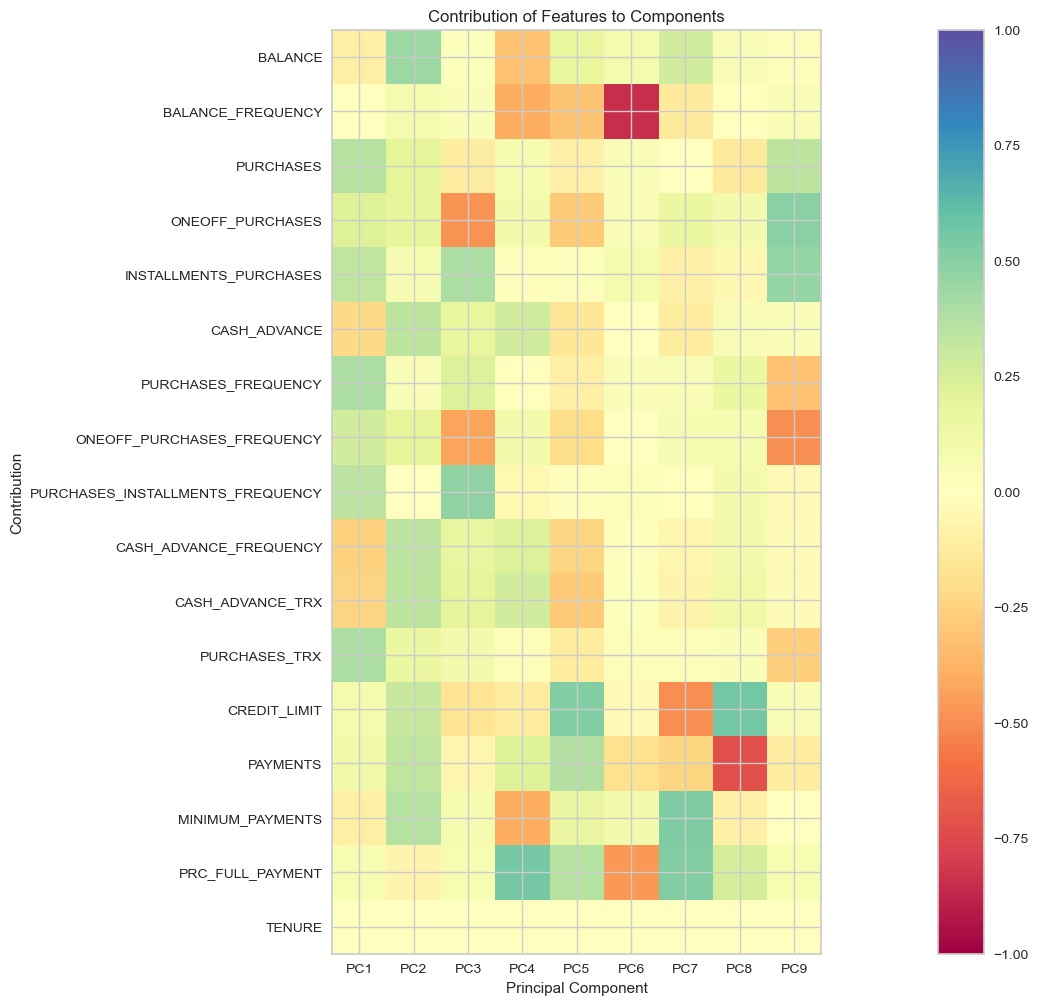

In [10]:
fig, ax = plt.subplots(figsize=(30, 12))
plt.imshow(pca.components_.T,
           cmap="Spectral",
           vmin=-1,
           vmax=1
          )
plt.yticks(range(len(std_imp_data.columns)), std_imp_data.columns)
plt.xticks(range(len(pca_data.columns)), pca_data.columns)
plt.xlabel("Principal Component")
plt.ylabel("Contribution")
plt.title("Contribution of Features to Components")
plt.colorbar()

# Train the Model


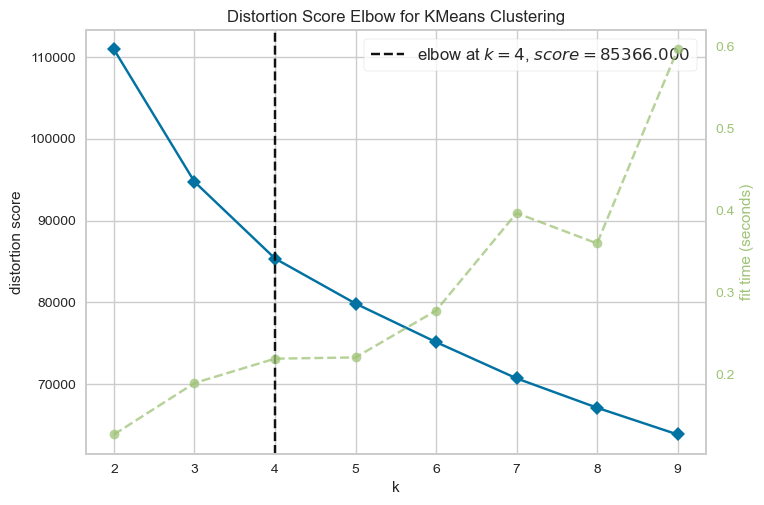

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
model = KMeans(random_state=42)
distortion_visualizer = KElbowVisualizer(model, k=(2,10))

distortion_visualizer.fit(std_imp_data)       
distortion_visualizer.show() 

In [12]:
km_model = KMeans(distortion_visualizer.elbow_value_, random_state=42)
labels_std = km_model.fit_predict(std_imp_data)
print(f'Davies-Bouldin index = {davies_bouldin_score(std_imp_data, labels_std)}')
print(f'Silhouette Score = {silhouette_score(std_imp_data, labels_std)}')

Davies-Bouldin index = 1.6872383448297135
Silhouette Score = 0.17444552186819787


## Find the `n_clusters` parameter using the elbow method

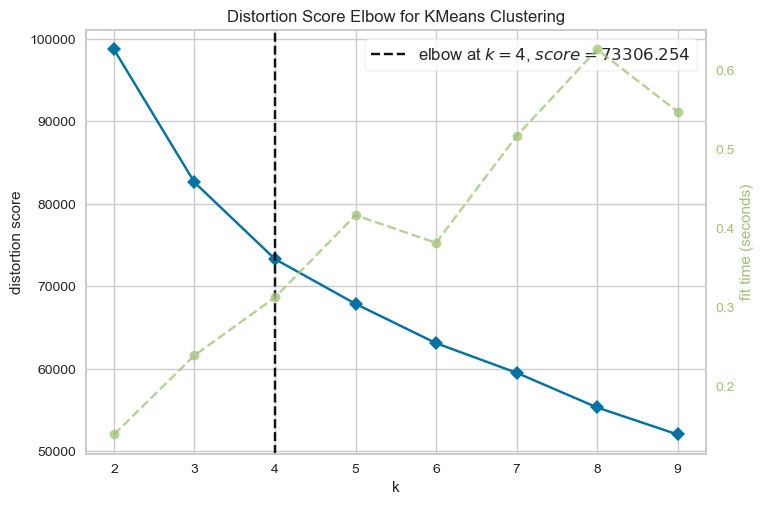

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
model = KMeans(random_state=42)
distortion_visualizer = KElbowVisualizer(model, k=(2,10))

distortion_visualizer.fit(pca_data)       
distortion_visualizer.show()       

In [14]:
km_model = KMeans(distortion_visualizer.elbow_value_, random_state=42)
labels = km_model.fit_predict(pca_data)

In [15]:
cc_general['LABELS'] = labels
std_imp_data['LABELS'] = labels
pca_data['LABELS'] = labels

Let's see how our data is distributed among these 4 clusters:

<AxesSubplot:ylabel='LABELS'>

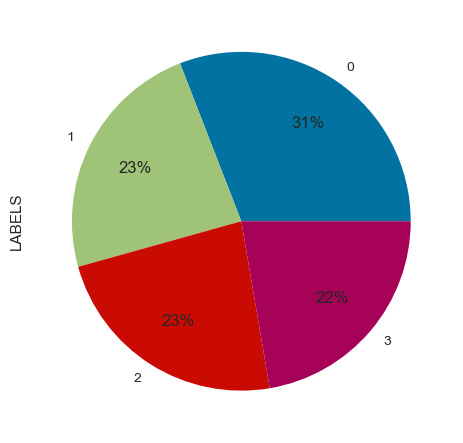

In [16]:
pca_data.LABELS.value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.1)

# Evaluate the Model

- **The Davis-Bouldin Index** is the average similarity between each cluster and the closest cluster. Scores range from 0 and up. 0 indicates better clustering.
- **The Silhouette Coefficient** is a value between -1 and 1. The higher the score, the better. 1 indicates tight clusters, and 0 means overlapping clusters. 

In [17]:
print(f'Davies-Bouldin index = {davies_bouldin_score(pca_data, labels)}')
print(f'Silhouette Score = {silhouette_score(pca_data, labels)}')

Davies-Bouldin index = 1.49287376707449
Silhouette Score = 0.2578488108872972


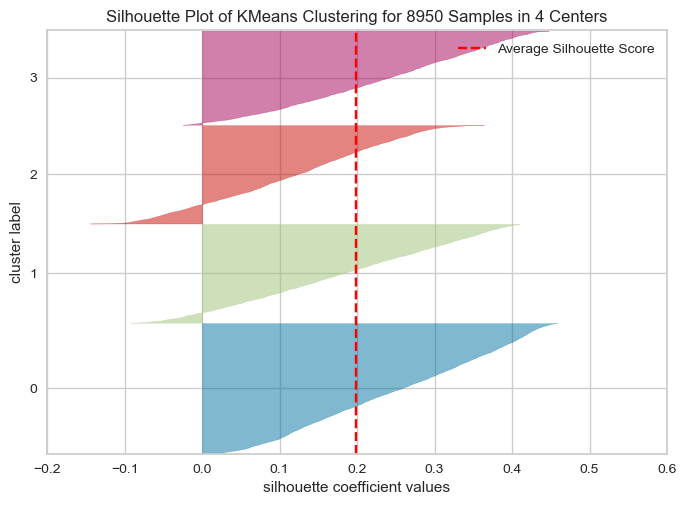

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 8950 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [18]:
visualizer = SilhouetteVisualizer(km_model, colors='yellowbrick')
visualizer.fit(pca_data.drop(['LABELS'],axis=1))
visualizer.show()

# Interpret the results


In [19]:
def spider_plot(data, title):
    means = data.groupby("LABELS").mean().to_numpy()
    names = data.columns[0:-1]
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(names))
    categories = np.arange(0, len(means))
    plt.figure(figsize=(10,10))
    plt.subplot(polar=True)
    for i in range(len(means)):
        plt.plot(label_loc, means[i], label=f'class {categories[i]}')
    plt.title(f'Feature comparison ({title})', size=20)
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=names)
    plt.legend()
    plt.show()

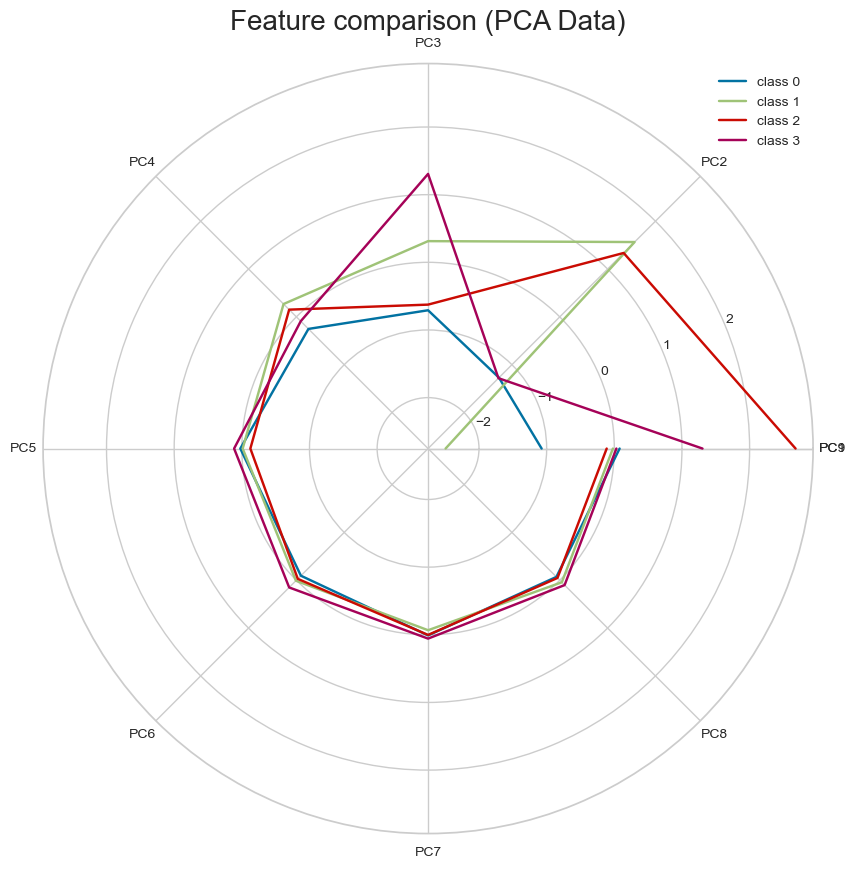

In [20]:
spider_plot(pca_data, 'PCA Data')

PC1, PC2 and PC3 were the most important Principal Components. Let's get the same plot, this time for original features:

## Standard, Imputed Data vs Labels!


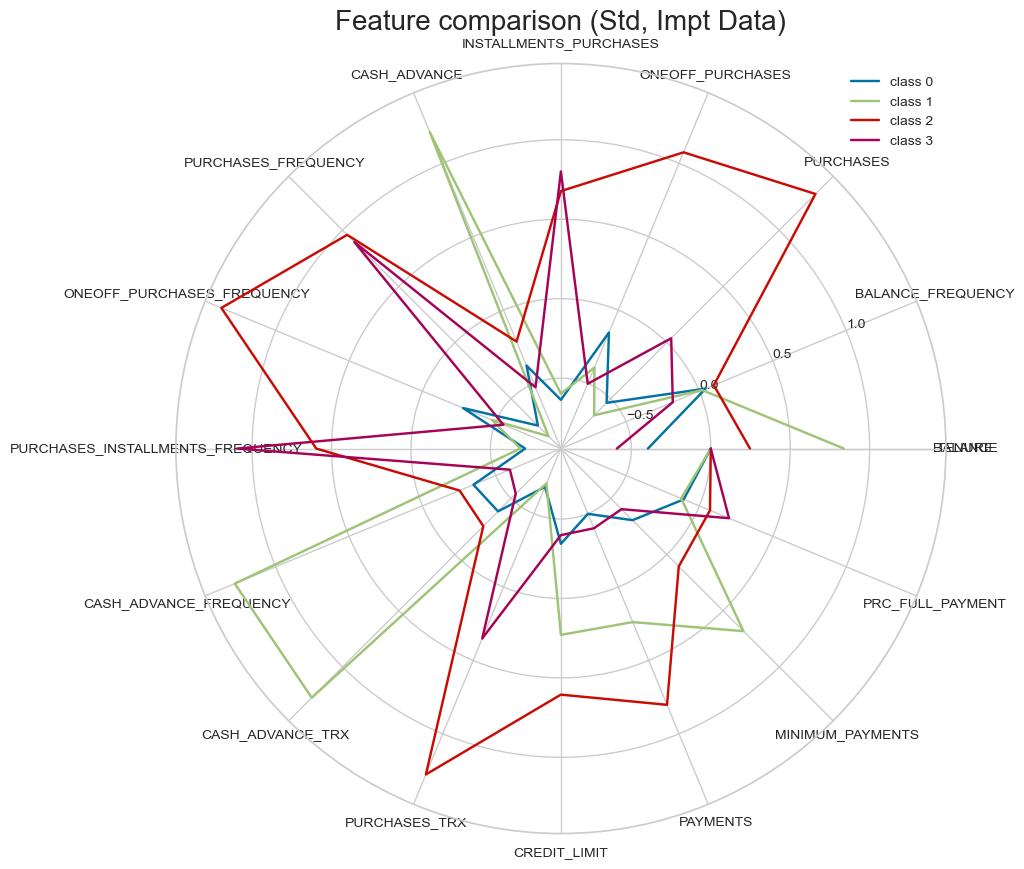

In [21]:
spider_plot(std_imp_data, 'Std, Impt Data')


- Class 0 contains customers who don't make a lot of money (look at their `BALANCE`, it is the lowest of all) but this doen't keep them away from purchasing stuff! in terms of `PURCHASES`, they are the second class. how do they do this? take a closer look: they don't buy stuff in one go (they have lowest ammount of `ONEOFF_PURCHASES` and `ONEOFF PURCHASES FREQUENCY`) their key to success is _instalments!_ It's easy: if you don't make enough money to buy stuff in one go, just pay over a period of time. (They have highest values of `INSTALLMENTSPURCHASES` and `PURCHASESINSTALLMENTSFREQUENCY`  I refer to these people as **Dreamers** because although they don't make much money, lack of money doesn't prevent them from reaching for their dreams!
- Class 1 shows customers who are not very rich, and don't take risks. their `BALANCE` (amount left in their account to make purchases) is below average, and they don't purchase much. (their `PURCHASES` is below average as well, and their `PURCHASE FREQUENCY` is very low.) I call these people **Economicals**. to them, every penny is important.
- Class 2 contains customers who have a good income (second highest `BALANCE`) and are enjoying it! they purchase a lot (highest `PURCHASESFREQUENCY`), both in installments and in one-go. let's call them **Bourgeoisie**!
- Class 3 is mysterious. look at them! they have highest `BALANCE`, but lowest `PURCHASE` of all! it seems they only use their fortunes when they want pay in advance (highest `CASHADVANCE`, `CASHADVANCEFREQUENCY` and `CASHADVANCETRX`). A cash advance is a service provided by most credit card and charge card issuers. The service allows cardholders to withdraw cash, either through an ATM or over the counter at a bank or other financial agency, up to a certain limit. For a credit card, this will be the credit limit (or some percentage of it). so, these guys don't use their credit cards to buy stuff, instead, they get chash from ATMs to do so. why? it is beause they want to buy something illegal? Let's just call them **The Mafia** for now.

## Evaluating our hypothesis

- If `BALANCE` is low and `PURCHASES` is high ➡ Class 0 (Dreamers ✨)
- If `BALANCE` is low and `PURCHASES` is low ➡ Class 1 (Economicals 💲)
- If `BALANCE` is high and `PURCHASES` is high ➡ Class 2 (Bourgeoisie 🛍️)
- If `BALANCE` is high and `PURCHASES` is low ➡ Class 3 (The Mafia 🕶️)

In [22]:
def colorful_scatter(data):   
    LABEL_COLOR_MAP = {0 : 'y',
                       1 : 'g',
                       2 : 'm',
                       3 : 'k'
                       }
    sns.jointplot(data=data, x="BALANCE", y="PURCHASES", hue="LABELS", palette=LABEL_COLOR_MAP, alpha=0.6, height=10)

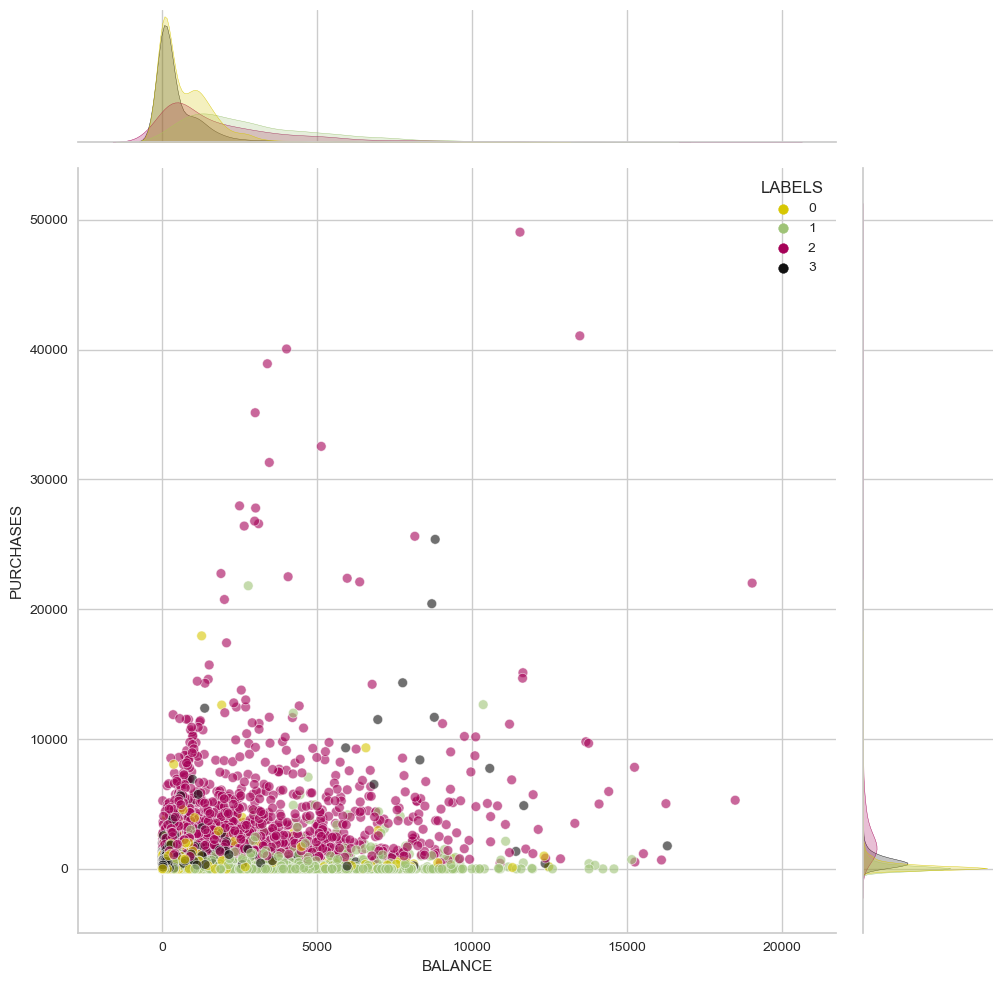

In [23]:
colorful_scatter(cc_general)

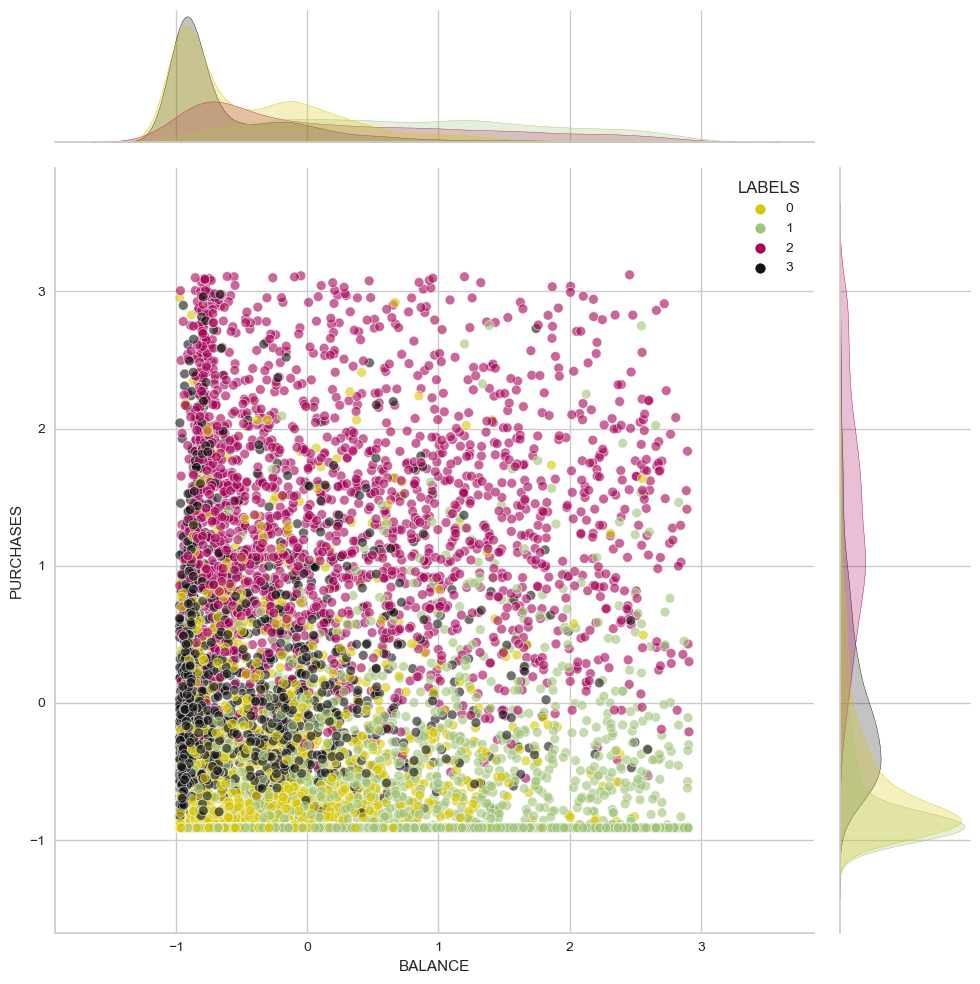

In [24]:
colorful_scatter(std_imp_data)